In [11]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
# dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
state = ['Ohio', 'Kentucky', 'American Samoa',  'Nevada', 'Wyoming', 'National', 'Alabama', 'Maryland', 'Alaska', 'Utah', 'Oregon', 'Montana', 'Illinois', 'Tennessee', 'District of Columbia', 'Vermont', 'Idaho', 'Arkansas', 'Maine', 'Washington', 'Hawaii', 'Wisconsin', 'Michigan', 'Indiana', 'New Jersey', 'Arizona', 'Guam', 'Mississippi', 'Puerto Rico', 'North Carolina', 'Texas', 'South Dakota', 'Northern Mariana Islands', 'Iowa', 'Missouri', 'Connecticut', 'West Virginia', 'South Carolina', 'Louisiana', 'Kansas', 'New York', 'Nebraska', 'Oklahoma', 'Florida', 'California', 'Colorado', 'Pennsylvania', 'Delaware', 'New Mexico', 'Rhode Island', 'Minnesota', 'Virgin Islands', 'New Hampshire', 'Massachusetts', 'Georgia', 'North Dakota', 'Virginia']

In [8]:
with open('university_towns.txt', 'r') as f:
        x = f.read().splitlines()

In [2]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. 
    The following cleaning is peprformed:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. remove newline character '\n'. '''
    with open('university_towns.txt', 'r') as f:
        x = f.read().splitlines()
        import re
    regex = re.compile('\(.+?\)') 
    regex2=re.compile('\[.+?\]') 
    for l in range(0,len(x)):
        x[l]= regex.sub('', x[l])
        x[l]= regex2.sub('', x[l])
    d={}
    for i in range(0,len(x)):
        if x[i] in state:
            st=x[i]
            d[st]=[]
            continue
        d[st].append(x[i])
    d
    dl=list(d.items())
    from pandas import Series
    df=pd.DataFrame(dl, columns=['State', 'Town'])
    df = df[['Town', 'State']]
    b=pd.concat([Series(row['State'], row['Town'])              
                    for _, row in df.iterrows()]).reset_index()
    b.columns = ['RegionName', 'State']
    b = b[['State', 'RegionName']]
    b['RegionName']=b['RegionName'].str.rstrip()
    b['RegionName'] = b['RegionName'].replace({"Pomona  and formerly Pomona College": "Pomona","Carrollton *Dahlonega": "Carrollton",
                                                   "Lexington (University of Kentucky, Transylvania University": "Lexington",
                                                   "Springfield , , and": "Springfield", "Waltham ,":"Waltham", 
                                               "Duluth (University of Minnesota Duluth, Lake Superior College, The College of St. Scholastica, University of Wisconsin–Superior, Duluth Business University": "Duluth",
                                              "Mankato , Bethany Lutheran College":"Mankato", "Fulton .": "Fulton", "Ewing ,":"Ewing", 
                                               "Jersey City ,":"Jersey City", "Madison , ,":"Madison", "Newark , ,":"Newark", 
                                              })
    b['RegionName'][414] = 'Providence'
    return b


In [9]:
house = pd.read_csv('City_Zhvi_AllHomes.csv')


In [5]:
def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. 
    '''
    house = pd.read_csv('City_Zhvi_AllHomes.csv')
    house=house.drop(house.columns[[range(6,51)]],axis=1).drop(house.columns[[0,3,4,5]],axis=1)
    house["State"] = house["State"].map(states)
    house.set_index(['State', 'RegionName'], inplace=True)
    house.columns = pd.to_datetime(house.columns)
    res = house.resample('Q', axis=1).mean()
    res = res.rename(columns=lambda col: '{}q{}'.format(col.year, col.quarter))
    res
    return res


c:\users\elysh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


(150000, 260000)

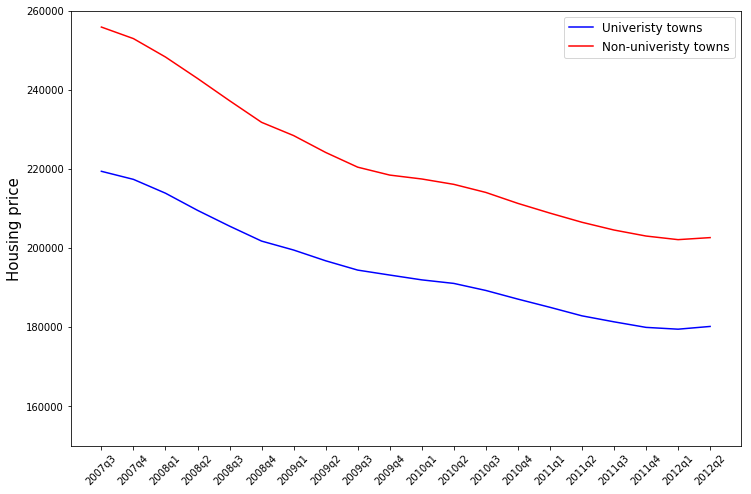

In [12]:
df=convert_housing_data_to_quarters()
start='2008q3'
bottom='2009q2'
unilist=get_list_of_university_towns()
unilist.set_index(['State', 'RegionName'], inplace=True)
df['price_ratio']=df[start]/df[bottom]
join=pd.merge(unilist, df, how='inner', left_index=True, right_index=True)
join.dropna(subset=['price_ratio'], inplace=True)
unitown=join['price_ratio']
nonunidf=df[~df.index.isin(unitown.index)]
nonunidf.dropna(subset=['price_ratio'], inplace=True)
nonuni=nonunidf['price_ratio']

Text(4.5,5e+06,'Recession Period')

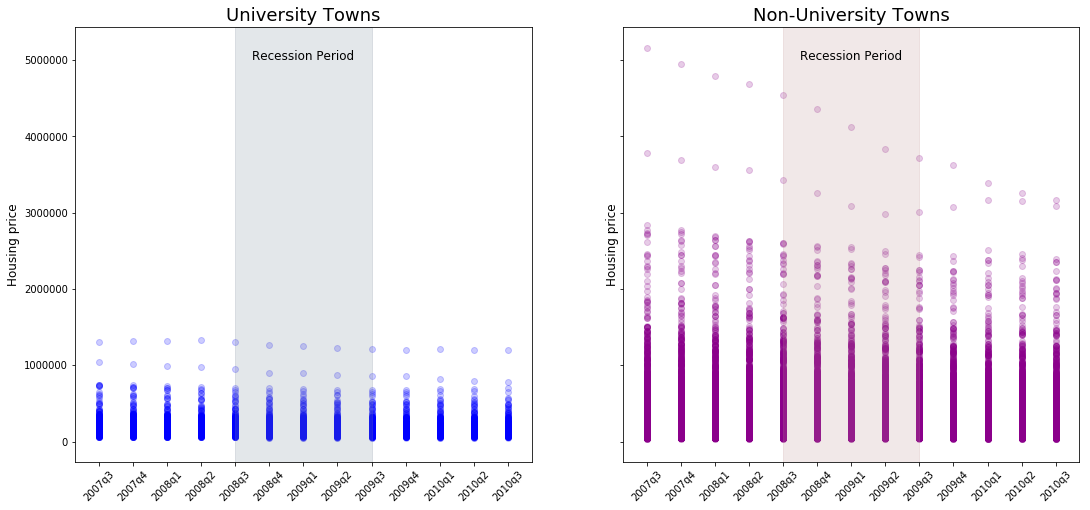

In [13]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(18,8))
for i, (name, value) in enumerate(join[join.columns[30:43]].iteritems()):
    ax1.scatter([i]*len(value), value, color='b', alpha=0.2)
ax1.set_xticks(range(len(join[join.columns[30:43]].columns)))
ax1.set_xticklabels(join[join.columns[30:43]].columns)
ax1.set_title('University Towns',fontsize =18)
ax1.set_ylabel('Housing price',fontsize = 12)
ax1.axvspan(4, 8, alpha=0.2, color='lightslategrey')
ax1.annotate('Recession Period', xy=(4.5, 5000000), xytext=(4.5, 5000000),fontsize =12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for i, (name, value) in enumerate(nonunidf[nonunidf.columns[30:43]].iteritems()):
    ax2.scatter([i]*len(value), value, color='darkmagenta',alpha=0.2)
ax2.set_xticks(range(len(nonunidf[nonunidf.columns[30:43]].columns)))
ax2.set_xticklabels(nonunidf[nonunidf.columns[30:43]].columns);
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax2.set_title('Non-University Towns',fontsize =18)
ax2.set_ylabel('Housing price',fontsize = 12)
ax2.axvspan(4, 8, alpha=0.2, color='rosybrown')
ax2.annotate('Recession Period', xy=(4.5, 5000000), xytext=(4.5, 5000000),fontsize =12)

58566.666666666664

In [15]:
most_drop=df.sort_values(by=['price_ratio'],ascending=False)[:150]
least_drop=df.sort_values(by=['price_ratio'])[:150]
ratio=most_drop['price_ratio']
dd=most_drop.reset_index()
citistate=dd['RegionName']+[', ']+dd['State']

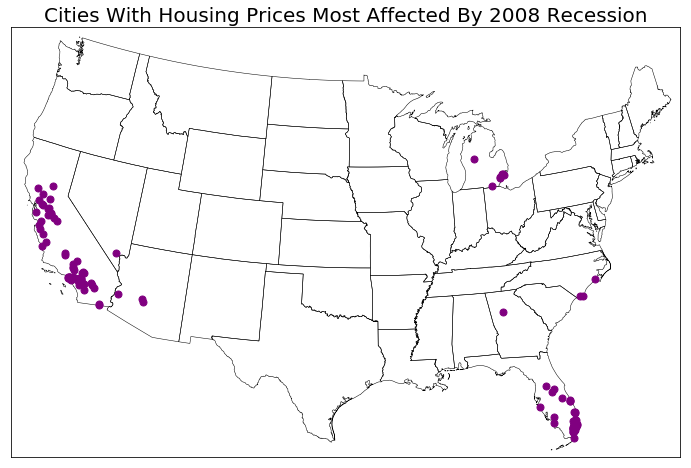

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

scale = 7
plt.figure(figsize=(12,8))
plt.title('Cities With Housing Prices Most Affected By 2008 Recession',fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim(timeout=10)
for (city,count) in zip(citistate, ratio):
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Purple',markersize=int(math.sqrt(count))*scale)
plt.show()

In [114]:
def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (reject the null hypothesis), or different=False if 
    otherwise (cannot reject the null hypothesis).  The
    value for better is either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    df=convert_housing_data_to_quarters()
    start=get_recession_start()
    bottom=get_recession_bottom()
    unilist=get_list_of_university_towns()
    unilist.set_index(['State', 'RegionName'], inplace=True)
    df['price_ratio']=df[start]/df[bottom]
    join=pd.merge(unilist, df, how='inner', left_index=True, right_index=True)
    join.dropna(subset=['price_ratio'], inplace=True)
    unitown=join['price_ratio']
    nonunidf=df[~df.index.isin(unitown.index)]
    nonunidf.dropna(subset=['price_ratio'], inplace=True)
    nonuni=nonunidf['price_ratio']
    from scipy import stats
    (st, p)=stats.ttest_ind(unitown, nonuni)
    different=False
    better="non-university town"
    if p<0.01:
        different=True
    if unitown.mean()<nonuni.mean():
        better="university town"
    
    return (different, p, better)
run_ttest()

c:\users\elysh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(True, 0.005496427353693887, 'university town')